In [7]:
import os
import glob
import torch
import numpy as np
from skimage import io, transform
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../src/models/")
from swin import BaseSwinUnet
from restormer import BaseRestormer
from bunet import BaseUnet
from noiseadding import build_noise_transforms, CombinedTransforms
from data import get_train_val_dataset, get_dataset, get_train_val_dataset
from metrics import ConfusionMatrix, RMSE
import torchvision
from numba import cuda

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [326]:
from data import get_train_val_dataset, get_dataset
from utils import RandomShift
noise_transforms = build_noise_transforms(5, scale=0.25)
firstbreak_dataset = get_dataset('denoise', noise_transforms=[RandomShift(mean=2.5, std=1.0, shift_mean=20, shift_std=10)])

In [327]:
loader = DataLoader(firstbreak_dataset, batch_size=8, shuffle=True)
sample = iter(loader).__next__()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


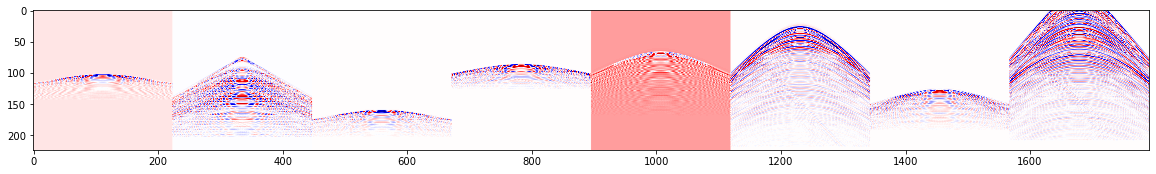

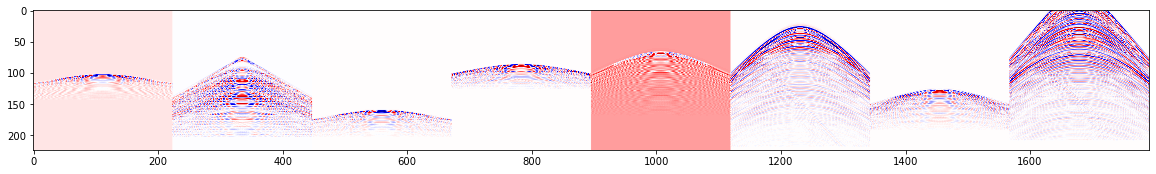

In [338]:
# Examine training data
%pylab inline
import torchvision
sample = iter(loader).next()
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['input'], padding=0)[0][None,...].permute((1, 2, 0)), cmap='seismic')
figure(figsize=(20,20)); imshow(torchvision.utils.make_grid(sample['target'].float(), padding=0)[0][None,...].permute((1, 2, 0)), cmap='seismic')
#sample['target']

In [153]:
from noiseadding import LowPassFilter
filt = LowPassFilter(cutoff=0.6)
filt.plot(sample['input'].numpy()[5,0])

torch.Size([8, 1, 224, 224])

In [162]:
np.random.randint(0,0,2)

ValueError: high <= 0

In [168]:
round(5.2)

5